In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import os
import datetime as dt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from category_encoders import HashingEncoder
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

sns.set(style="darkgrid")
dark_palette = sns.dark_palette("#d90429", as_cmap=True)

In [2]:
ruta = '/Users/Gerson/Desktop/Data-Science.'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

In [30]:
# Agrego una  columna identificada como "monto total"
df['monto total'] = df['Qty'] * df['Amount']

# Agregar otra columna identificada columna "Precio Promedio"
df['Precio Promedio'] = df['Amount'] / df['Qty']

df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,monto total,Precio Promedio,Fulfilment-encoded
0,0,40580787845731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,MUMBAI,MAHARASHTRA,400081.0,IN,No especificado,False,Easy Ship,0.0,inf,1.0
1,1,17191981511101146,2022-04-30,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,406.0,406.0,1.0
2,2,40406876767273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,329.0,329.0,0.0
3,3,40396153778133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No especificado,False,Easy Ship,0.0,inf,1.0
4,4,40710697907240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,CHENNAI,TAMIL NADU,600073.0,IN,No especificado,False,Easy Ship,574.0,574.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128851 entries, 0 to 128850
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128851 non-null  int64  
 1   Order ID            128851 non-null  object 
 2   Date                128851 non-null  object 
 3   Status              128851 non-null  object 
 4   Fulfilment          128851 non-null  object 
 5   ship-service-level  128851 non-null  object 
 6   Style               128851 non-null  object 
 7   SKU                 128851 non-null  object 
 8   Category            128851 non-null  object 
 9   Size                128851 non-null  object 
 10  ASIN                128851 non-null  object 
 11  Courier Status      121979 non-null  object 
 12  Qty                 128851 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128818 non-nul

In [5]:
#Realizamos limpieza de los datos:

df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

df.dropna(subset=['currency', 'Amount', 'monto total', 'Precio Promedio', 'Qty'], inplace=True)

valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

imputer = SimpleImputer(strategy='most_frequent')

df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_2264/3041476265.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ship-postal-code'].fillna('No especificado', inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128850
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Date                121180 non-null  object 
 3   Status              121180 non-null  object 
 4   Fulfilment          121180 non-null  object 
 5   ship-service-level  121180 non-null  object 
 6   Style               121180 non-null  object 
 7   SKU                 121180 non-null  object 
 8   Category            121180 non-null  object 
 9   Size                121180 non-null  object 
 10  ASIN                121180 non-null  object 
 11  Courier Status      121180 non-null  object 
 12  Qty                 121180 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           121180 non-null  ob

In [7]:
# Elimino los guiones de la columna 'Order ID'
df['Order ID'] = df['Order ID'].str.replace('-', '')

# Convierto la columna a tipo numérico
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [8]:
#convierto el campo date en formato fecha.
df['Date']=pd.to_datetime(df['Date'])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_2264/2547805998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [26]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Amazon", "Merchant"]])

# Ajustamos el codificador con la variable Fulfilment y la transformamos
encoder.fit(df[["Fulfilment"]])
df["Fulfilment-encoded"] = encoder.transform(df[["Fulfilment"]])

In [31]:
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["Set", "kurta", "Western Dress", "Top", "Ethnic Dress", "Blouse", "Bottom", "Saree", "Dupatta"]])

# Ajustamos el codificador con la variable Fulfilment y la transformamos
encoder.fit(df[["Category"]])
df["Category-encoded"] = encoder.transform(df[["Category"]])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128850
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121180 non-null  int64         
 1   Order ID            121180 non-null  int64         
 2   Date                121180 non-null  datetime64[ns]
 3   Status              121180 non-null  object        
 4   Fulfilment          121180 non-null  object        
 5   ship-service-level  121180 non-null  object        
 6   Style               121180 non-null  object        
 7   SKU                 121180 non-null  object        
 8   Category            121180 non-null  object        
 9   Size                121180 non-null  object        
 10  ASIN                121180 non-null  object        
 11  Courier Status      121180 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

In [33]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

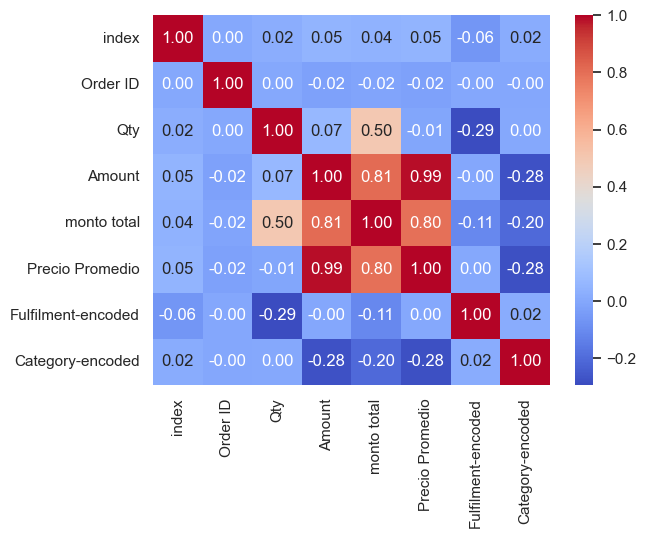

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [11]:
target_correlation = correlation_matrix['monto total'].sort_values(ascending=False)

In [20]:
X = df[['Qty']]  
y = df['monto total']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')

R²: 0.2285406396408367
MSE: 83436.10596588481
